In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib
import numpy as np
import tika
import glob
import os
import calplot

2024-02-05 14:28:52.389822: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)

2.13.1


In [3]:
print(tika.__version__)

2.6.0


In [4]:
path = './full-data' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []
print(all_files)

for filename in all_files:
    print("Processing "+filename)
    df = pd.read_csv(filename, index_col=None, header=0,on_bad_lines='warn')
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

['./full-data/reports.csv']
Processing ./full-data/reports.csv


In [5]:
frame

,Report Type,Id,Class,Submitted Date,Headline,Year,Season,Month,State,County,...,Environment,Follow-Up,Follow-Up Report,Date,Author,Media Source,Source Url,Media Issue,Observed.1,A & G References
0,Report,13038,Class A,"Saturday, November 12, 2005.",Snowmobiler has encounter in deep snow near Po...,2004,Winter,February,Alaska,Anchorage,...,"In the middle of the woods, in a clearing cove...",Follow-up investigation report by BFRO Investi...,The animal was running from the approaching sn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Report,8792,Class B,"Thursday, June 3, 2004.",Four nocturnal hikers get pelted with snow nea...,2003,Winter,December,Alaska,Anchorage,...,"A pine forest, with a bog or swamp on the righ...",Follow-up investigation report by BFRO Investi...,The area under consideration is at the eastern...,Friday night,NaN,NaN,NaN,NaN,NaN,NaN
2,Report,1255,Class B,"Tuesday, October 5, 1999.",Creature observed walking back and forth by wi...,1998,Fall,September,Alaska,Bethel,...,Call Iliamna Air taxi for lat & Long of Long L...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
3,Media Article,658,NaN,"Wednesday, January 23, 2013",Legendary Bigfoot sighted near Kasigluk,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,By KJ Lincoln,The Delta Discovery,http://www.deltadiscovery.com/story/2013/01/23...,"Volume 15, Issue 4",Here is the original sketch of the creature wi...,NaN
4,Report,11616,Class B,"Friday, May 6, 2005.",Fishermen find footprints east of Egegik,2004,Summer,July,Alaska,Bristol Bay,...,"Lake front,creek spit, gravel and sand, alder ...",Follow-up investigation report by BFRO Investi...,I had an extended conversation with the witnes...,20,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5462,Report,1411,Class A,"Tuesday, January 23, 2001.",Family sees massive ape just after daybreak ne...,1994,Summer,June,Wyoming,Teton,...,Open flat field then dipping down to the east ...,Follow-up investigation report,"Witness age 51, elaborated on the creature's p...",20,NaN,NaN,NaN,NaN,NaN,NaN
5463,Media Article,59,NaN,"Wednesday, June 18, 1980",Two Men Report Seeing Huge Hairy Creature,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,I,daho Falls Post-Register,NaN,"Robert Goodrich and Glenn Towner, no hometown ...",The two men said that they were going to visit...,NaN
5464,Report,14714,Class A,"Friday, May 19, 2006.",Early morning sighting by newspaper deliverer ...,2005,Winter,November,Wyoming,Uinta,...,"Well, between the intersection of 411 and 410 ...",Follow-up investigation report by BFRO Investi...,I spoke with the witness a couple times going ...,dont know,NaN,NaN,NaN,NaN,NaN,NaN
5465,Report,12884,Class A,"Tuesday, October 25, 2005.",Daytime sighting by six siesmographic workers ...,1984,Winter,January,Wyoming,Uinta,...,We where in the Uinta mountains. There's a lot...,Follow-up investigation report by BFRO Investi...,"5/31/06, I spoke to the witness yesterday eve...",15th,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(frame.columns)

Index(['Report Type', 'Id', 'Class', 'Submitted Date', 'Headline', 'Year',
       'Season', 'Month', 'State', 'County', 'Location Details',
       'Nearest Town', 'Nearest Road', 'Observed', 'Also Noticed',
       'Other Witnesses', 'Other Stories', 'Time And Conditions',
       'Environment', 'Follow-Up', 'Follow-Up Report', 'Date', 'Author',
       'Media Source', 'Source Url', 'Media Issue', 'Observed.1',
       'A & G References'],
      dtype='object')


In [7]:
season_distribution = frame.Season.dropna() #there are NaN values for Season
season_distribution = season_distribution.unique()
season_distribution.sort()
print(season_distribution)

['Fall' 'Spring' 'Summer' 'Unknown' 'Winter']


In [8]:
season_counts = frame.Season.value_counts()
print(season_counts)

Season
Summer     1865
Fall       1487
Spring      827
Winter      745
Unknown      92
Name: count, dtype: int64


In [9]:
# force NaN values for Season to be Unknown
frame.Season = frame.Season.fillna('Unknown')

In [10]:
# now recount without dropna and should work fine
season_distribution = frame.Season.unique()
season_distribution.sort()
print(season_distribution)

['Fall' 'Spring' 'Summer' 'Unknown' 'Winter']


In [11]:
season_counts = frame.Season.value_counts()
print(season_counts)

Season
Summer     1865
Fall       1487
Spring      827
Winter      745
Unknown     543
Name: count, dtype: int64


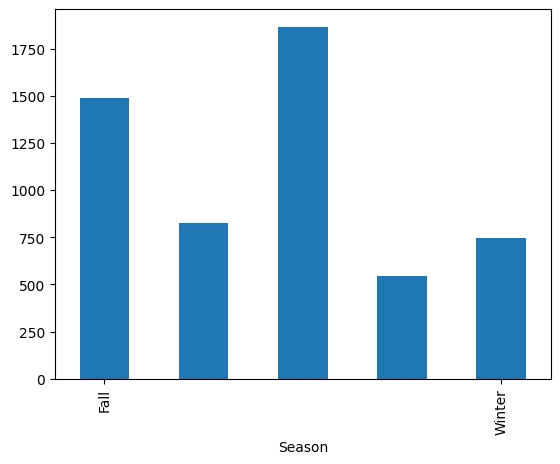

In [12]:
import matplotlib.ticker as mticker

myLocator = mticker.MultipleLocator(4)
plt = season_counts.sort_index().plot.bar()
plt.xaxis.set_major_locator(myLocator)

In [13]:
class_distribution = frame.Class.dropna() #there are NaN values for Class
class_distribution = class_distribution.unique()
class_distribution.sort()
print(class_distribution)

['Class A' 'Class B' 'Class C']


In [14]:
class_counts = frame.Class.value_counts()
print(class_counts)

Class
Class B    2508
Class A    2478
Class C      30
Name: count, dtype: int64


In [15]:
frame.Class = frame.Class.fillna('Unknown')

In [16]:
# now recount without dropna and should work fine
class_distribution = frame.Class.unique()
class_distribution.sort()
print(class_distribution)

['Class A' 'Class B' 'Class C' 'Unknown']


In [17]:
class_counts = frame.Class.value_counts()
print(class_counts)

Class
Class B    2508
Class A    2478
Unknown     451
Class C      30
Name: count, dtype: int64


<Axes: xlabel='Class'>

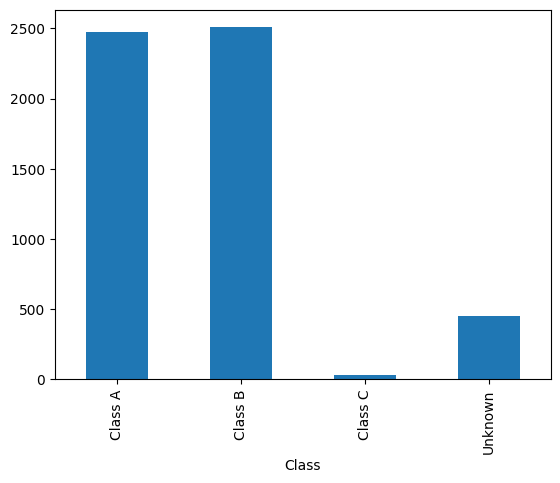

In [18]:
class_counts.sort_index().plot.bar()

In [57]:
rt_distribution = frame['Report Type'].unique()
rt_distribution.sort()
print(rt_distribution)

['Media Article' 'Report']


In [58]:
rt_counts = frame['Report Type'].value_counts()
print(rt_counts)

Report Type
Report           5016
Media Article     451
Name: count, dtype: int64


<Axes: xlabel='Report Type'>

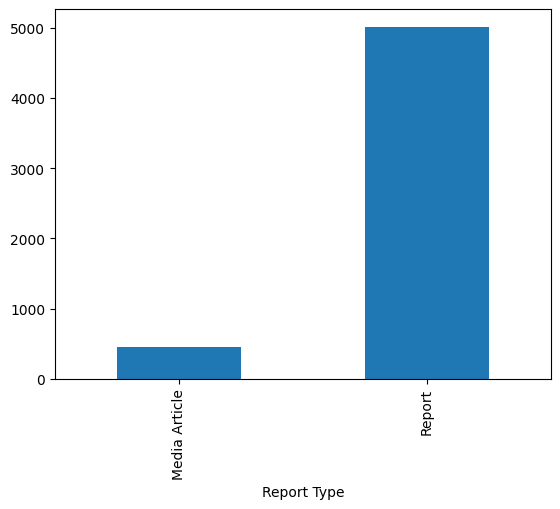

In [59]:
rt_counts.sort_index().plot.bar()

In [19]:
year_distribution = frame.Year.dropna() #there are NaN values for Year
year_distribution = year_distribution.unique()
year_distribution.sort()
print(year_distribution)

["'73-'74?" "'92-'93" "'96" '04-05' '04-present' '05' '07' '07-26-08' '08'
 '08-09' '09-12' '1/5/1998' '11/15/2012' '1870' '1890' '1905' '1910'
 '1920' '1921' '1925' '1926' '1930' "1930's" '1932' '1937' '1938' '1940'
 '1941' '1942' '1943' '1944' '1945' '1947/48' '1948' '1949' '1950'
 "1950's" '1951/2' '1952 or 1953' '1952-53' '1953' '1953-1976' '1954'
 '1954-55' '1955' '1956' '1956 or 1957' '1957' '1957 or 58' '1958' '1959'
 '1959 or 60' '1960' "1960's" '1960/2010' '1961' '1961 1962' '1962'
 '1962?' '1963' '1963-2002' '1964' '1965' '1965-66' '1966' '1967'
 '1967-1970' '1967/1993' '1968' '1968 or 69' '1969' '1969-1979'
 '1969-1980' '1970' '1970  1990' "1970 or '71" "1970's" "1970's-1980's"
 '1970-1972' '1970-71' '1970?' '1970s-1980s' '1971' '1971 or 72'
 '1971-2-3?' '1971-72' '1971-72?' '1972' '1972(?)' '1972-1974?'
 '1972-1978' '1972-73' '1973' "1973 or '74" '1973 or 74' "1973-'76"
 '1973-1974?' '1973-1975' '1973-74' '1973-74?' '1973?' '1974'
 '1974 or 1975' '1974-1976' '1975' '1975-19

In [20]:
year_counts = frame.Year.value_counts()
print(year_counts)

Year
2012         191
2000         189
2004         173
2006         173
2005         169
            ... 
1967/1993      1
early90s       1
Sep 2014       1
197?           1
1890           1
Name: count, Length: 429, dtype: int64


In [21]:
frame.Year = frame.Year.fillna('Unknown')

In [22]:
# now recount without dropna and should work fine
year_distribution = frame.Year.unique()
year_distribution.sort()
print(year_distribution)

["'73-'74?" "'92-'93" "'96" '04-05' '04-present' '05' '07' '07-26-08' '08'
 '08-09' '09-12' '1/5/1998' '11/15/2012' '1870' '1890' '1905' '1910'
 '1920' '1921' '1925' '1926' '1930' "1930's" '1932' '1937' '1938' '1940'
 '1941' '1942' '1943' '1944' '1945' '1947/48' '1948' '1949' '1950'
 "1950's" '1951/2' '1952 or 1953' '1952-53' '1953' '1953-1976' '1954'
 '1954-55' '1955' '1956' '1956 or 1957' '1957' '1957 or 58' '1958' '1959'
 '1959 or 60' '1960' "1960's" '1960/2010' '1961' '1961 1962' '1962'
 '1962?' '1963' '1963-2002' '1964' '1965' '1965-66' '1966' '1967'
 '1967-1970' '1967/1993' '1968' '1968 or 69' '1969' '1969-1979'
 '1969-1980' '1970' '1970  1990' "1970 or '71" "1970's" "1970's-1980's"
 '1970-1972' '1970-71' '1970?' '1970s-1980s' '1971' '1971 or 72'
 '1971-2-3?' '1971-72' '1971-72?' '1972' '1972(?)' '1972-1974?'
 '1972-1978' '1972-73' '1973' "1973 or '74" '1973 or 74' "1973-'76"
 '1973-1974?' '1973-1975' '1973-74' '1973-74?' '1973?' '1974'
 '1974 or 1975' '1974-1976' '1975' '1975-19

In [23]:
year_counts = frame.Year.value_counts()
print(year_counts)

Year
Unknown      452
2012         191
2000         189
2004         173
2006         173
            ... 
1967/1993      1
early90s       1
Sep 2014       1
197?           1
1890           1
Name: count, Length: 430, dtype: int64


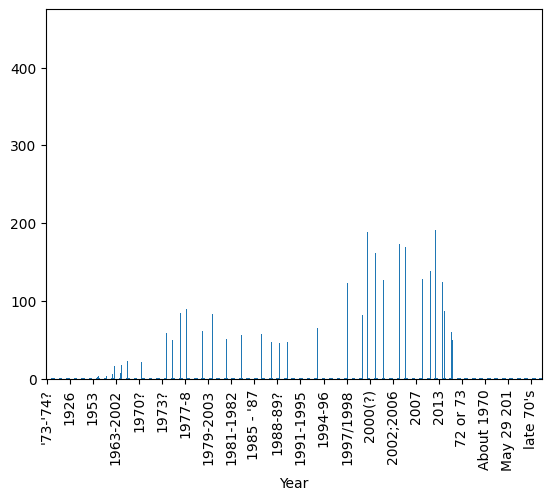

In [24]:
import matplotlib.ticker as mticker

myLocator = mticker.MultipleLocator(20)
plt = year_counts.sort_index().plot.bar()
plt.xaxis.set_major_locator(myLocator)

In [27]:
headlines = frame['Headline'].str.split(' ', expand=True)

array([['Snowmobiler', 'has', 'encounter', ..., None, None, None],
       ['Four', 'nocturnal', 'hikers', ..., None, None, None],
       ['Creature', 'observed', 'walking', ..., None, None, None],
       ...,
       ['Early', 'morning', 'sighting', ..., None, None, None],
       ['Daytime', 'sighting', 'by', ..., None, None, None],
       ['Car', 'passenger', 'sees', ..., None, None, None]], dtype=object)

In [28]:
hv = headlines.values
hv

array([['Snowmobiler', 'has', 'encounter', ..., None, None, None],
       ['Four', 'nocturnal', 'hikers', ..., None, None, None],
       ['Creature', 'observed', 'walking', ..., None, None, None],
       ...,
       ['Early', 'morning', 'sighting', ..., None, None, None],
       ['Daytime', 'sighting', 'by', ..., None, None, None],
       ['Car', 'passenger', 'sees', ..., None, None, None]], dtype=object)

In [29]:
all_headlines = hv[hv != np.array(None)]
all_headlines_list = all_headlines.tolist()

In [30]:
h_values, h_counts = np.unique(all_headlines, return_counts=True)

In [31]:
print(str(len(h_values)))
print(h_values)

8326
['' '"' '"Ape"' ... "‘sighting'" '“A”' '“creature”']


In [32]:
print(str(len(h_counts)))
print(h_counts)

8326
[609   7   1 ...   1   1   1]


In [33]:
wf_dict = {'headlines' : h_values, 
           'counts':    h_counts
          }
word_freq = pd.DataFrame(wf_dict)

In [34]:
headline_distribution = word_freq.headlines.unique()
headline_distribution.sort()
print(headline_distribution)

['' '"' '"Ape"' ... "‘sighting'" '“A”' '“creature”']


In [35]:
word_freq.headlines.value_counts()
wf_counts = word_freq.headlines.value_counts()

In [36]:
word_freq

,headlines,counts
0,,609
1,"""",7
2,"""Ape""",1
3,"""Arkansas",1
4,"""Big",2
...,...,...
8321,‘You,1
8322,‘most,1
8323,‘sighting',1
8324,“A”,1


In [37]:
wc_data = dict(zip(word_freq['headlines'].tolist(), word_freq['counts'].tolist()))
#print(wc_data)

In [39]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, max_words=500).generate_from_frequencies(wc_data)

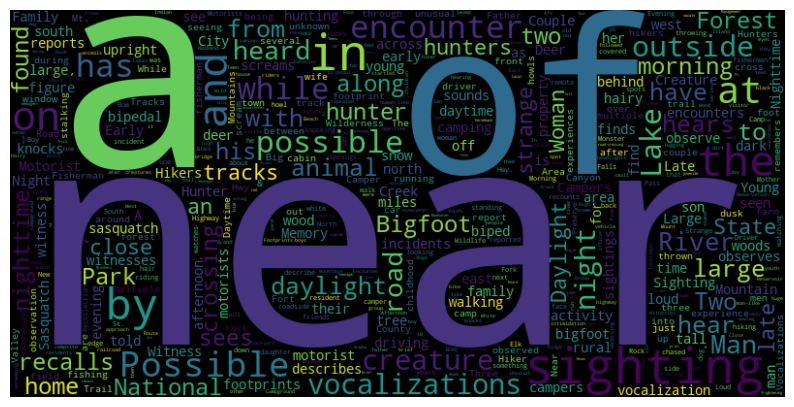

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
mdf = word_freq.loc[word_freq['counts'].idxmax()]
mdf

headlines    near
counts       2145
Name: 6867, dtype: object

In [42]:
mdf2 = word_freq.nlargest(10, ['counts'])

In [43]:
mdf2

,headlines,counts
6867,near,2145
5058,a,1748
6958,of,1341
7583,sighting,1265
6465,in,1253
7898,the,965
5443,by,944
5120,and,849
6974,on,796
5183,at,680


           counts
headlines        
a            1748
and           849
at            680
by            944
in           1253
near         2145
of           1341
on            796
sighting     1265
the           965


<Axes: xlabel='headlines'>

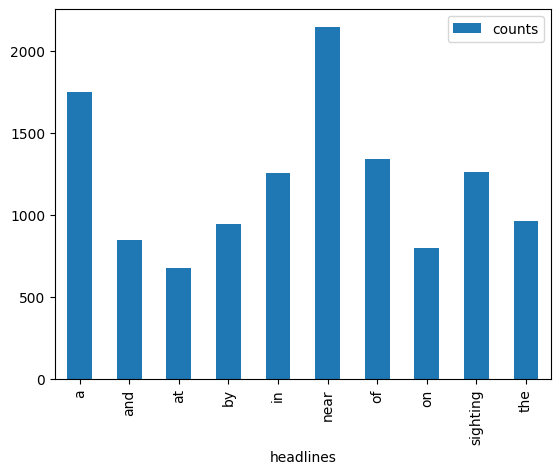

In [44]:
query1=mdf2[['headlines','counts']].groupby('headlines').sum()
print(query1)
query1.set_index(mdf2.headlines.unique())
query1.plot(kind='bar')

In [45]:
frame['Graph_Date'] =  pd.to_datetime(frame['Submitted Date'], infer_datetime_format=True, format='mixed')

/var/folders/3m/bnxnw5n12f59kl79c5bt4q4c0000gq/T/ipykernel_29700/2405307364.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  frame['Graph_Date'] =  pd.to_datetime(frame['Submitted Date'], infer_datetime_format=True, format='mixed')


In [46]:
gdate_series = frame.groupby("Graph_Date").size().values
gdate_df = frame.drop_duplicates(subset="Graph_Date").assign(Count=gdate_series)

In [47]:
gdate_df

,Report Type,Id,Class,Submitted Date,Headline,Year,Season,Month,State,County,...,Follow-Up Report,Date,Author,Media Source,Source Url,Media Issue,Observed.1,A & G References,Graph_Date,Count
0,Report,13038,Class A,"Saturday, November 12, 2005.",Snowmobiler has encounter in deep snow near Po...,2004,Winter,February,Alaska,Anchorage,...,The animal was running from the approaching sn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-11-12,1
1,Report,8792,Class B,"Thursday, June 3, 2004.",Four nocturnal hikers get pelted with snow nea...,2003,Winter,December,Alaska,Anchorage,...,The area under consideration is at the eastern...,Friday night,NaN,NaN,NaN,NaN,NaN,NaN,2004-06-03,1
2,Report,1255,Class B,"Tuesday, October 5, 1999.",Creature observed walking back and forth by wi...,1998,Fall,September,Alaska,Bethel,...,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,1999-10-05,1
3,Media Article,658,Unknown,"Wednesday, January 23, 2013",Legendary Bigfoot sighted near Kasigluk,Unknown,Unknown,NaN,NaN,NaN,...,NaN,NaN,By KJ Lincoln,The Delta Discovery,http://www.deltadiscovery.com/story/2013/01/23...,"Volume 15, Issue 4",Here is the original sketch of the creature wi...,NaN,2013-01-23,1
4,Report,11616,Class B,"Friday, May 6, 2005.",Fishermen find footprints east of Egegik,2004,Summer,July,Alaska,Bristol Bay,...,I had an extended conversation with the witnes...,20,NaN,NaN,NaN,NaN,NaN,NaN,2005-05-06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,Report,6441,Class A,"Tuesday, June 3, 2003.",Party of five campers observe 7 foot creature ...,2000,Summer,June,Wyoming,Teton,...,"I interviewed the witness on September 7,...",12,NaN,NaN,NaN,NaN,NaN,NaN,2003-06-03,1
5462,Report,1411,Class A,"Tuesday, January 23, 2001.",Family sees massive ape just after daybreak ne...,1994,Summer,June,Wyoming,Teton,...,"Witness age 51, elaborated on the creature's p...",20,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-23,1
5463,Media Article,59,Unknown,"Wednesday, June 18, 1980",Two Men Report Seeing Huge Hairy Creature,Unknown,Unknown,NaN,NaN,NaN,...,NaN,NaN,I,daho Falls Post-Register,NaN,"Robert Goodrich and Glenn Towner, no hometown ...",The two men said that they were going to visit...,NaN,1980-06-18,1
5464,Report,14714,Class A,"Friday, May 19, 2006.",Early morning sighting by newspaper deliverer ...,2005,Winter,November,Wyoming,Uinta,...,I spoke with the witness a couple times going ...,dont know,NaN,NaN,NaN,NaN,NaN,NaN,2006-05-19,1


In [48]:
gdate_df.set_index('Graph_Date', inplace=True)

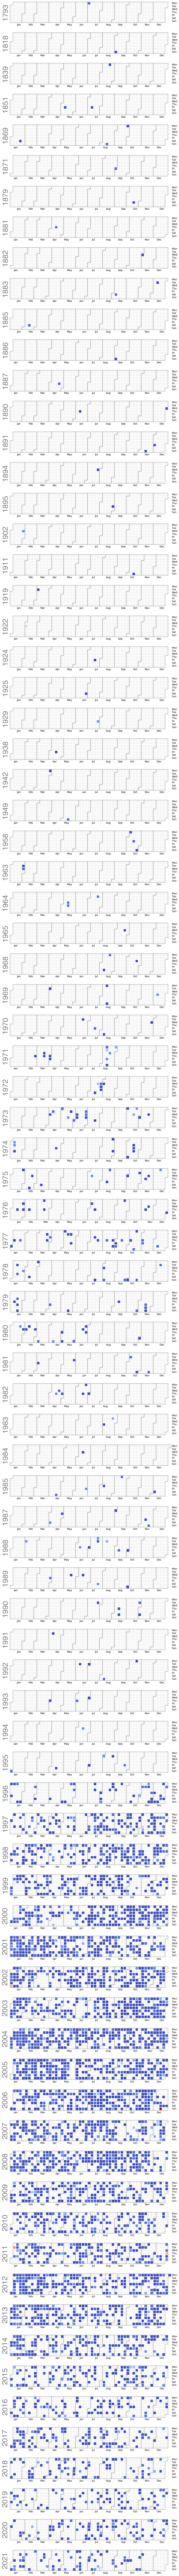

In [49]:
calplot.calplot(gdate_df['Count'], cmap="coolwarm", colorbar=False);

In [50]:
gdate_df_ca = gdate_df[gdate_df['Class'] == 'Class A']

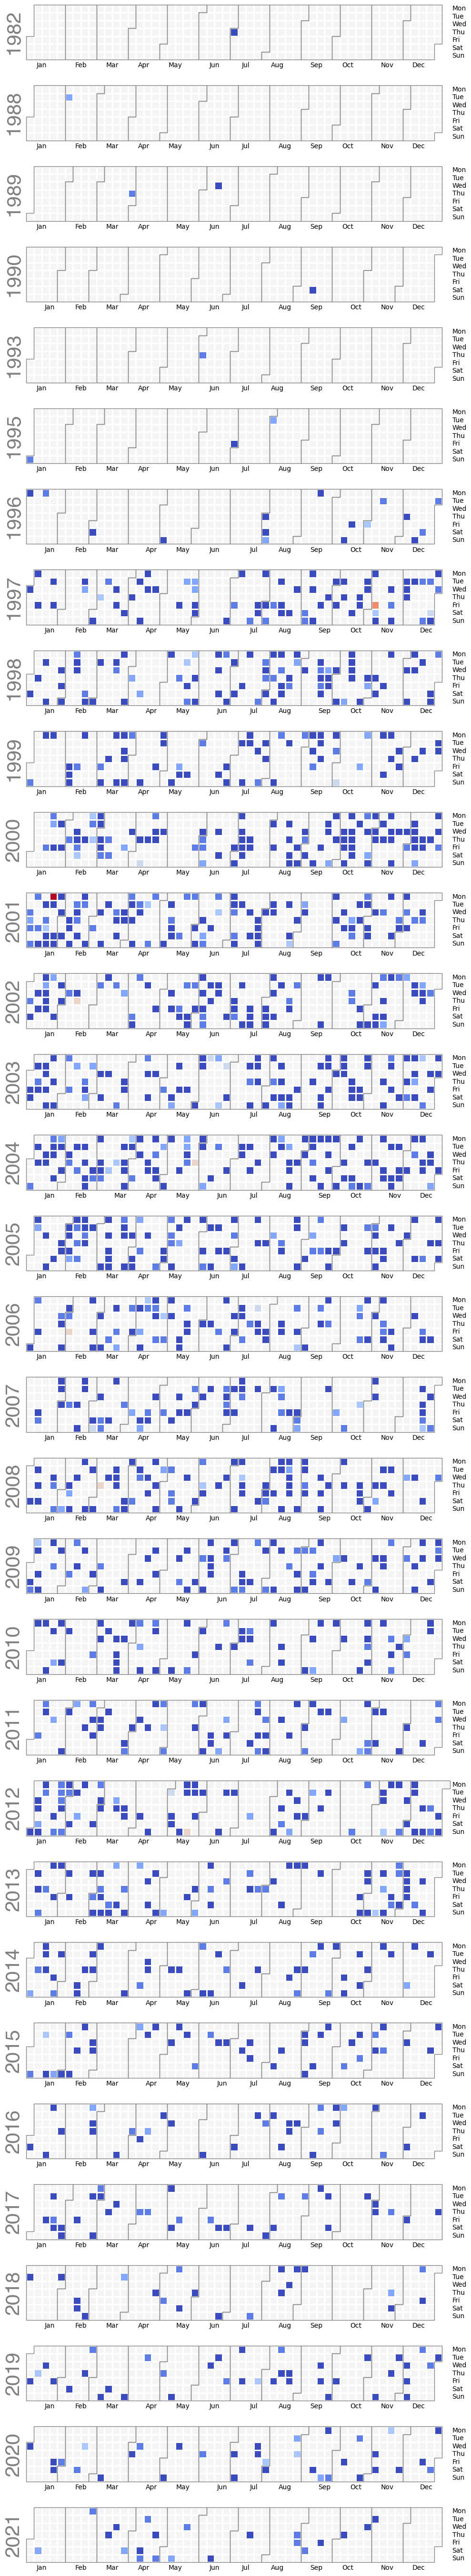

In [51]:
calplot.calplot(gdate_df_ca['Count'], cmap="coolwarm", colorbar=False);